In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import keras
from keras.applications.imagenet_utils import preprocess_input

In [13]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
#EDA
#Let's get some boxplots for each numeric variable and a correlation heatmap for the datasset.

numeric_feature = ['age','sex','trestbps','chol','thalach','oldpeak','slope','ca']
eda_df = data.loc[:,numeric_feature].copy()


c:\users\sakeena muzammil\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\sakeena muzammil\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\sakeena muzammil\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wi

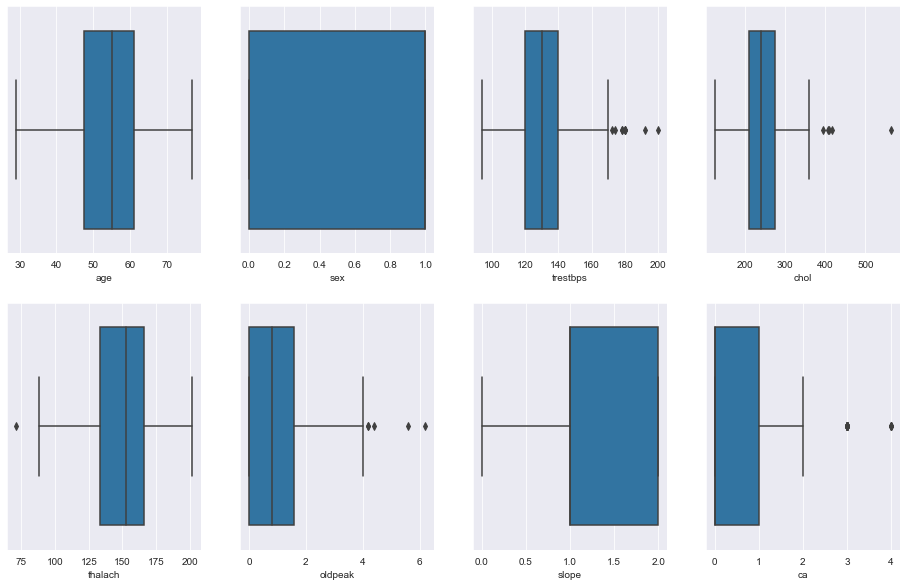

In [26]:
plt.figure(figsize = (16,10))

for i in range(len(eda_df.columns)):
    plt.subplot(2,4,i+1)
    sns.boxplot(eda_df[eda_df.columns[i]])
    
plt.show()   

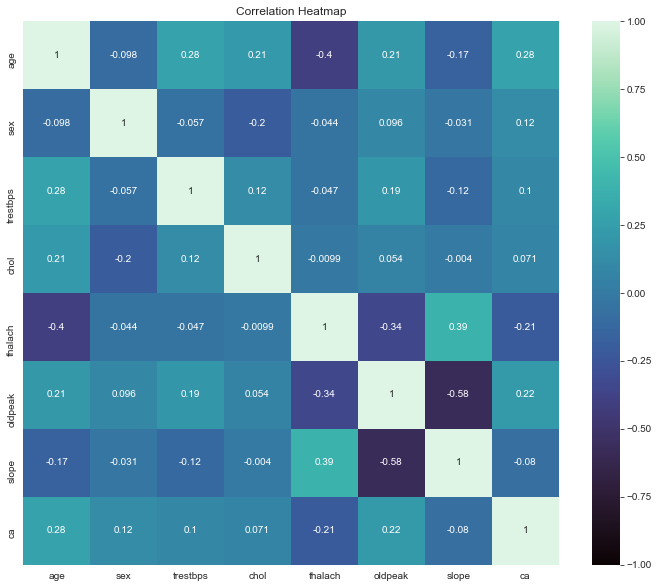

In [27]:
corr = eda_df.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(corr,annot = True,vmin = -1.0,cmap = 'mako')
plt.title('Correlation Heatmap')
plt.show()

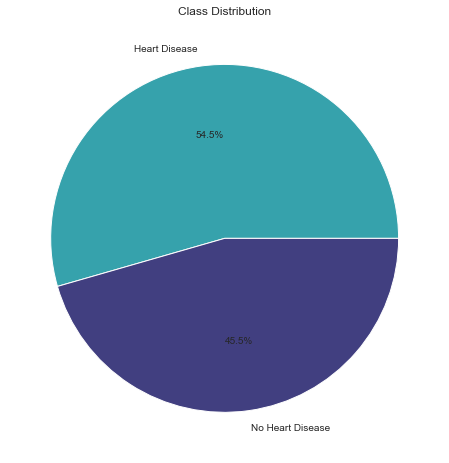

In [32]:
#Lets also visualize  the class distribution with a pie Chart

plt.figure(figsize = (8,8))
plt.pie(data['target'].value_counts(),labels = ['Heart Disease','No Heart Disease'],autopct = '%.1f%%',colors = ['#36a2ac','#413f80'])
plt.title("Class Distribution")
plt.show()

In [33]:
#preprocessing
pd.get_dummies(X['thal'],prefix = 'TH')

,TH_0,TH_1,TH_2,TH_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [43]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column],prefix = prefix)
        df = pd.concat([df,dummies],axis = 1)
        df = df.drop(column,axis = 1)
        return df

In [44]:
nominal_features = ['cp','slope','thal']

In [45]:
dict(zip(nominal_features,['CP','SL','TH']))

{'cp': 'CP', 'slope': 'SL', 'thal': 'TH'}

In [53]:
#Preprocesing

def preprocessing_inputs(df,scaler):
    df = df.copy()
    #one -hot encode nominal feature
    nominal_features = ['cp','slope','thal']
    df = onehot_encode(df,dict(zip(nominal_features, ['CP','SL','TH'])))
    
    #Split df into x and y
    y = df['target'].copy()
    X = df.drop('target',axis = 1).copy()
    
    
    #Scale x
    X = pd.DataFrame(scaler.fit_transform(X))
    
    

    return X,y

In [66]:
X,y = preprocessing_inputs(data,MinMaxScaler())

In [67]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,0.0,0.0,0.0,1.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,0.0,1.0,0.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,1.0,0.0,0.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0,0.0,0.0,1.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,1.0,0.0,0.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,1.0,0.0,0.0,0.0


In [68]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [69]:
{column: len(X[column].unique()) for column in X.columns}

{0: 41,
 1: 2,
 2: 49,
 3: 152,
 4: 2,
 5: 3,
 6: 91,
 7: 2,
 8: 40,
 9: 3,
 10: 5,
 11: 4,
 12: 2,
 13: 2,
 14: 2,
 15: 2}

In [70]:
#Training

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 0)

In [71]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test,y_test) * 100))

Logistic Regression Accuracy: 83.61%


In [72]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

print("Support Vector Machine Accuracy: {:.2f}%".format(svm_model.score(X_test,y_test) * 100))


Support Vector Machine Accuracy: 86.89%


In [73]:
nn_model = MLPClassifier()
nn_model.fit(X_train,y_train)

print("Neural networkAccuracy: {:.2f}%".format(nn_model.score(X_test,y_test) * 100))

Neural networkAccuracy: 83.61%


c:\users\sakeena muzammil\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
